<a href="https://colab.research.google.com/github/AhmadMessbah/Python_330990/blob/master/AMERICAT%20DATA%20ACCIDENT%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files

uploaded = files.upload()


Saving Amercian accident.csv to Amercian accident.csv


In [9]:
import pandas as pd
file_path=list(uploaded.keys())[0]
df=pd.read_csv(file_path)
df.head()


,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,Source2,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1,A-2,Source2,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,A-3,Source2,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,A-4,Source2,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,4,A-5,Source2,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   ID                     10000 non-null  object 
 2   Source                 10000 non-null  object 
 3   Severity               10000 non-null  int64  
 4   Start_Time             10000 non-null  object 
 5   End_Time               10000 non-null  object 
 6   Start_Lat              10000 non-null  float64
 7   Start_Lng              10000 non-null  float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           10000 non-null  float64
 11  Description            10000 non-null  object 
 12  Street                 10000 non-null  object 
 13  City                   10000 non-null  object 
 14  County                 10000 non-null  object 
 15  Sta

In [13]:
df.drop(columns=["Unnamed: 0", "ID", "End_Lat", "End_Lng", "Country"], inplace=True)


In [18]:
missing_values=df.isnull().sum()/len(df) *100
missing_values[missing_values>0]


,0
Zipcode,0.01
Timezone,0.01
Airport_Code,0.01
Weather_Timestamp,0.31
Temperature(F),0.85
Wind_Chill(F),85.74
Humidity(%),1.24
Pressure(in),0.35
Visibility(mi),0.96
Wind_Direction,0.31


In [24]:
df.drop(columns=["Wind_Chill(F)", "Precipitation(in)"], inplace=True)


In [30]:
df["Temperature(F)"].fillna(df["Temperature(F)"].mean(), inplace=True)
df["Wind_Speed(mph)"].fillna(df["Wind_Speed(mph)"].median(), inplace=True)


<ipython-input-30-a437834ef084>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Temperature(F)"].fillna(df["Temperature(F)"].mean(), inplace=True)
<ipython-input-30-a437834ef084>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [31]:
df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0], inplace=True)
df["Timezone"].fillna(df["Timezone"].mode()[0], inplace=True)


<ipython-input-31-3ca999b3cf4a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0], inplace=True)
<ipython-input-31-3ca999b3cf4a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [33]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])


df["Accident_Duration"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 60  # Convert to minutes
df.drop(columns=["End_Time"], inplace=True)  # We don’t need it anymore


In [39]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Source                 10000 non-null  object        
 1   Severity               10000 non-null  int64         
 2   Start_Time             10000 non-null  datetime64[ns]
 3   Start_Lat              10000 non-null  float64       
 4   Start_Lng              10000 non-null  float64       
 5   Distance(mi)           10000 non-null  float64       
 6   Description            10000 non-null  object        
 7   Street                 10000 non-null  object        
 8   City                   10000 non-null  object        
 9   County                 10000 non-null  object        
 10  State                  10000 non-null  object        
 11  Zipcode                9999 non-null   object        
 12  Timezone               10000 non-null  object        
 13  Ai

,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_Duration
0,Source2,3,2016-02-08 05:46:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,...,False,False,False,False,False,Night,Night,Night,Night,314.0
1,Source2,2,2016-02-08 06:07:00,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,...,False,False,False,False,False,Night,Night,Night,Day,30.0
2,Source2,2,2016-02-08 06:49:00,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,False,False,False,True,False,Night,Night,Day,Day,30.0
3,Source2,3,2016-02-08 07:23:00,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,False,False,False,False,False,Night,Day,Day,Day,30.0
4,Source2,2,2016-02-08 07:39:00,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,False,False,False,True,False,Day,Day,Day,Day,30.0


In [40]:
df["Severity"].value_counts()

,count
Severity,
2,6047
3,3941
1,6
4,6


In [43]:
df["Severity"].value_counts(normalize=True) * 100  # Percentage distribution


,proportion
Severity,
2,60.47
3,39.41
1,0.06
4,0.06


In [49]:
import matplotlib.pyplot as plt # Make sure to import the module using the plt alias.
import seaborn as sns

plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<ipython-input-57-58988630896e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Severity"], palette="Blues")


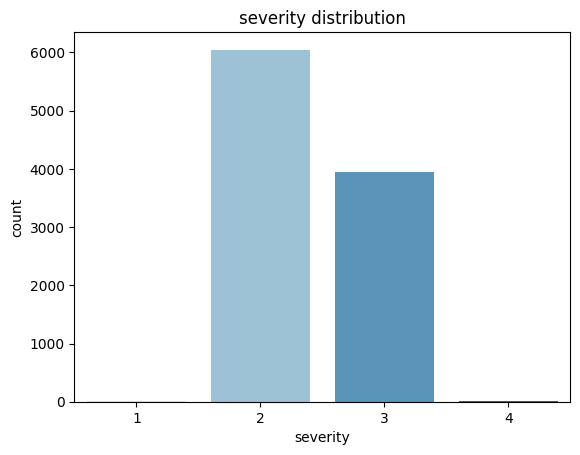

In [57]:
sns.countplot(x=df["Severity"], palette="Blues")
plt.xlabel("severity")
plt.ylabel("count")
plt.title("severity distribution")
plt.show()